In [2]:
# %load deep_module.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) =  cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 16s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


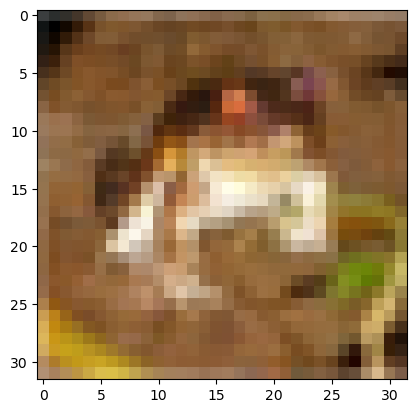

In [7]:
plt.imshow(X_train[0])
plt.show()

In [8]:
# 데이터 정규화 및 해렬 reshape
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(np.unique(y_train)) # 클래스 확인(10개)

[0 1 2 3 4 5 6 7 8 9]


In [9]:
class_name = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1843328   
                                                      

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './data/model/all/cnn-{epoch:03d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stop, checkpointer])


Epoch 1: val_loss improved from inf to 1.37701, saving model to ./data/model/all\cnn-001-0.5179.hdf5

Epoch 2: val_loss improved from 1.37701 to 1.23185, saving model to ./data/model/all\cnn-002-0.5654.hdf5

Epoch 3: val_loss improved from 1.23185 to 1.13035, saving model to ./data/model/all\cnn-003-0.6071.hdf5

Epoch 4: val_loss improved from 1.13035 to 1.03990, saving model to ./data/model/all\cnn-004-0.6393.hdf5

Epoch 5: val_loss improved from 1.03990 to 1.00041, saving model to ./data/model/all\cnn-005-0.6539.hdf5

Epoch 6: val_loss improved from 1.00041 to 0.97615, saving model to ./data/model/all\cnn-006-0.6614.hdf5

Epoch 7: val_loss improved from 0.97615 to 0.96538, saving model to ./data/model/all\cnn-007-0.6647.hdf5

Epoch 8: val_loss improved from 0.96538 to 0.93764, saving model to ./data/model/all\cnn-008-0.6750.hdf5

Epoch 9: val_loss improved from 0.93764 to 0.91947, saving model to ./data/model/all\cnn-009-0.6797.hdf5

Epoch 10: val_loss improved from 0.91947 to 0.914

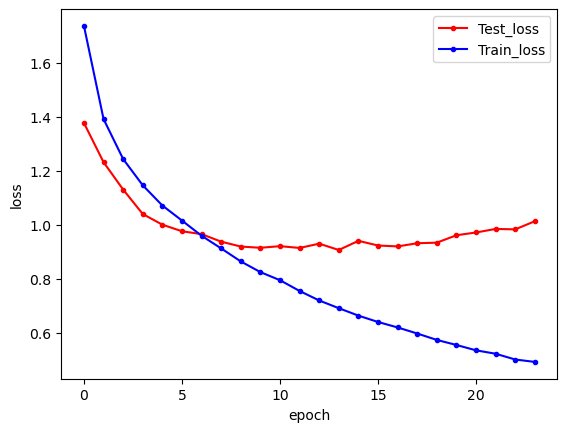

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='Test_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='Train_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [21]:
pd_class = model.predict(X_test[2000].reshape(1, 32, 32, 3))
pd_class

1/1 [==============================] - 0s 182ms/step


array([[1.5089492e-04, 8.1237304e-01, 2.8899167e-05, 1.2161586e-03,
        2.4317720e-05, 1.1293637e-05, 1.8473014e-01, 5.9459359e-07,
        6.8072433e-04, 7.8393752e-04]], dtype=float32)

In [22]:
class_name[pd_class.argmax()]

'automobile'